# Project: Investigate a Dataset (Medical Appointment No Shows)

### Table of Contents
+ [Introduction](#introduction)
+ [Data Wrangling](#data_wrangling)
+ [Exploratory Data Analysis](#exploratory_data_analysis)
+ [Conclusions](#conclusions)

<a id='introduction'></a>
## Introduction:
__Selected Dataset:__ [No Show Appointments](https://www.kaggle.com/datasets/joniarroba/noshowappointments)

__Dataset Description:__
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

+ __PatientId:__ indicates the patient ID; duplication is possible due to cases where the same patient booked more than one appointment.
+ __AppointmentID:__ indicates appoint ID, this field should be unique
+ __Gender:__  indicates the patient's gender __(M/F)__
+ __ScheduledDay:__ indicates the Date/Time the patient set up their appointment.
+ __AppointmentDay:__ indicates the date/time the patient called to book their appointment.
+ __Age:__ indicates the patient's age.
+ __Neighborhood:__ indicates the location of the hospital.
+ __Scholarship:__ True or False (Patient enrolled in Brasilian welfare program Bolsa Família).
+ __Hipertension:__ True or False.
+ __Diabetes:__ True or False.
+ __Alcoholism:__ True or False.
+ __Handcap:__ True or False. 0 for no disabilities, 1-4 for number of disabilities. [according to kaggle](https://www.kaggle.com/joniarroba/noshowappointments/discussion/29699)
+ __SMS_received:__ indicates whether or not the patient has received a reminder text message.
+ __no-show:__ True (__‘Yes’__) or False (__‘No’__).

__Question Overview__

For this dataset we would be looking at some important factors for us to know in order to predict if a patient will show up for their scheduled appointment?

We will start by importing the packaes we need for this analysis

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='data_wrangling'></a>
## Data Wrangling:

### 1. Gather and Access Dataset: 
Display the general properties and build intuition from the dataset using functions like Info, unique data, describe, datatypes and so on.

In [2]:
# Load dataset
df = pd.read_csv('noshowappointments.csv')

# Display first 2 rows of dataset
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


For easy access lets do some column data cleaning.

__Clean dataset column Labels for easier access__
+ Change all columns to lower case.
+ Replace No-show hiphen with and underscore.
+ Place an underscore before id and day.

In [3]:
# Data Cleaning
# replace hyphen with underscores, place an undaerscore before day or id and lowercase labels.
df.rename(columns=lambda x: x.strip().lower().replace("-","_"), inplace=True)
df.rename(columns={'patientid': 'patient_id',
                   'appointmentid': 'appointment_id',
                   'scheduledday': 'scheduled_day',
                  'appointmentday': 'appointment_day'}, inplace=True)
list(df.columns)

['patient_id',
 'appointment_id',
 'gender',
 'scheduled_day',
 'appointment_day',
 'age',
 'neighbourhood',
 'scholarship',
 'hipertension',
 'diabetes',
 'alcoholism',
 'handcap',
 'sms_received',
 'no_show']

In [4]:
# get the general info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   patient_id       110527 non-null  float64
 1   appointment_id   110527 non-null  int64  
 2   gender           110527 non-null  object 
 3   scheduled_day    110527 non-null  object 
 4   appointment_day  110527 non-null  object 
 5   age              110527 non-null  int64  
 6   neighbourhood    110527 non-null  object 
 7   scholarship      110527 non-null  int64  
 8   hipertension     110527 non-null  int64  
 9   diabetes         110527 non-null  int64  
 10  alcoholism       110527 non-null  int64  
 11  handcap          110527 non-null  int64  
 12  sms_received     110527 non-null  int64  
 13  no_show          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.shape

(110527, 14)

In [6]:
# get number of unique values (rows) in each columns
df.nunique()

patient_id          62299
appointment_id     110527
gender                  2
scheduled_day      103549
appointment_day        27
age                   104
neighbourhood          81
scholarship             2
hipertension            2
diabetes                2
alcoholism              2
handcap                 5
sms_received            2
no_show                 2
dtype: int64

In [7]:
df.describe()

,patient_id,appointment_id,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


__Dataset Observation:__
+ There is no mising values `from df.info() non-null count`.
+ There are 14 columns and 110527 rows `from df.shape`
+ AppointmentID has no duplicates `from df.nunique()`.
+ The avaerage age is 37, maximum age is 115 and 25% of patients are 18 or lower. Also interestingly the lowest age is -1 so we would investigate that.
+ From the PatientId and AppointmetID it shows that some patients booked multiple appointments. We will investigate this. 
+ From `df.describe()` scholarships, hipertension, diabetes, alcoholism and handicap all shows False for 75% or lower. So we would plot a `df.hist()` to get some more insight to their frequency.

To have a general overview/preliminary understanding of the dataset we do a general plot using `df.hist()`.

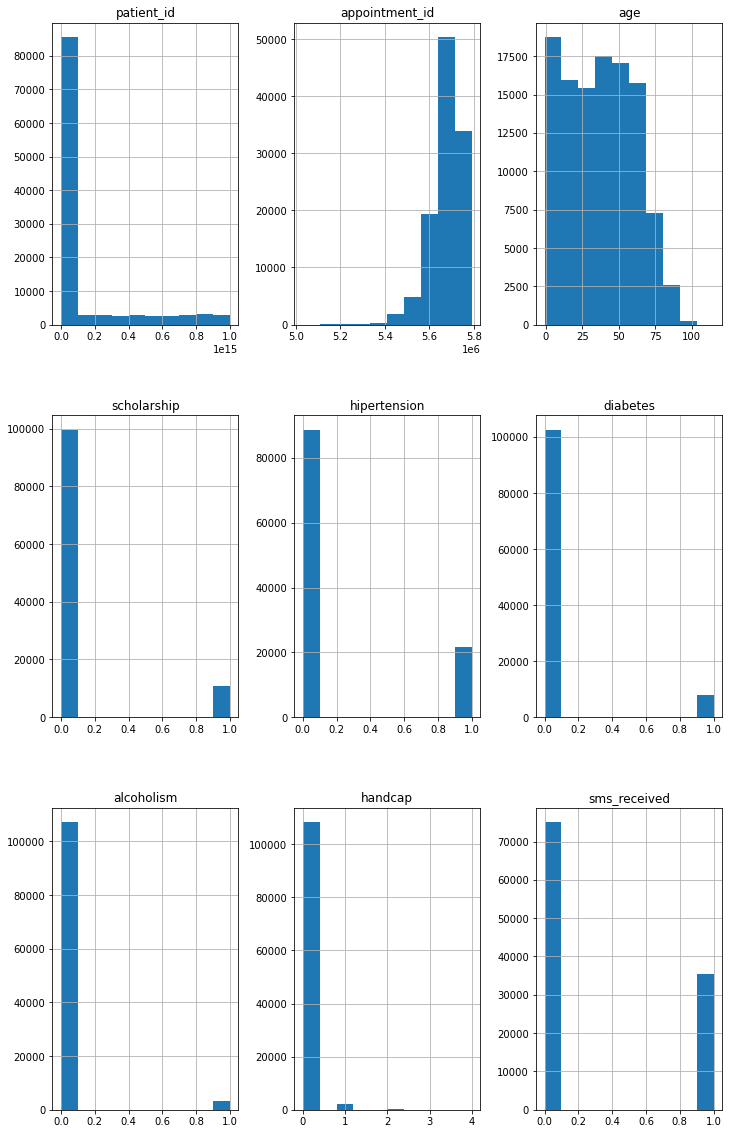

In [8]:
df.hist(figsize=(12,20));

This shows some insights to the distribution of some of the characteristics of the patients. In general a vast majority of patients are not alcoholics, diagnosed with hipertension or for diabetes, and are not on scholarship. Also about twice the number of patients did not recieve any sms reminder before their scheduled appointment.

For some clarity on the percentage ratio of the above characteristics and few others, we can do a pie chart. So far the histogram shows less than 10% of patients are alcholic and handcap so we can exclude this characteristics.

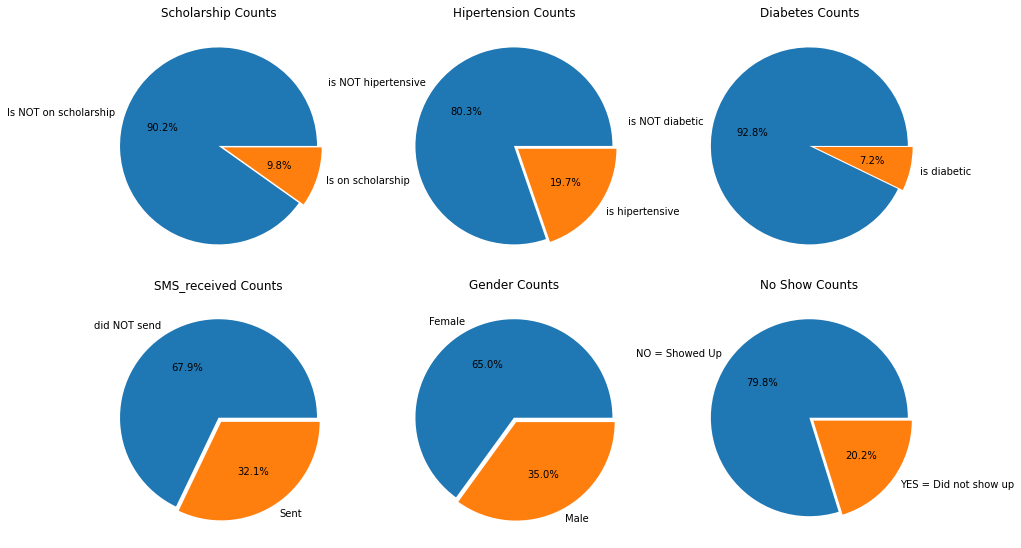

In [9]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(15,15))
plt.subplots_adjust(hspace=-0.5)

scholarship = df.scholarship.value_counts();
hipertension = df.hipertension.value_counts();
diabetes = df.diabetes.value_counts();
sms = df.sms_received.value_counts();
gender = df.gender.value_counts();
no_show = df.no_show.value_counts();

ax1.pie(scholarship,labels = ['Is NOT on scholarship', 'Is on scholarship'], autopct = '%1.1f%%', explode=(0, .05));
ax1.set_title('Scholarship Counts');

ax2.pie(hipertension,labels = ['is NOT hipertensive', 'is hipertensive'], autopct = '%1.1f%%', explode=(0, .05));
ax2.set_title('Hipertension Counts');

ax3.pie(diabetes,labels = ['is NOT diabetic', 'is diabetic'], autopct = '%1.1f%%', explode=(0, .05));
ax3.set_title('Diabetes Counts');

ax4.pie(sms,labels = ['did NOT send', 'Sent'], autopct = '%1.1f%%', explode=(0, .05));
ax4.set_title('SMS_received Counts');

ax5.pie(gender,labels = ['Female', 'Male'], autopct = '%1.1f%%', explode=(0, .05));
ax5.set_title('Gender Counts');

ax6.pie(no_show,labels = ['NO = Showed Up', 'YES = Did not show up'], autopct = '%1.1f%%', explode=(0, .05));
ax6.set_title('No Show Counts');

Next we use a [seaborn heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) to try and find some insights into the correlation between a number of patients charateristics

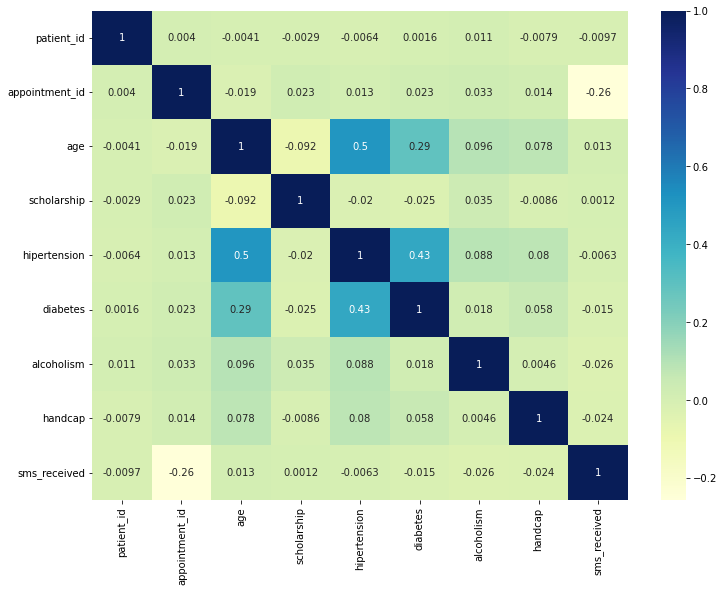

In [10]:
fig, ax = plt.subplots(figsize=(12,9));
sns.heatmap(df.corr(), ax=ax,  annot=True, cmap="YlGnBu");

As seen in the map the colors shows areas with different heat signatures, an interesting correlation we would be looking at from the above heatmap is the correlation between `age` and `hipertension`. We would be discarding diabetes because less than 10% are diabetic. For Now we will keep scholarships.

__From the above visualizations some interesting factors that we would be taking a closer look at are:__
+ ___age___
+ ___gender___
+ ___sms reminder___
+ ___hipertension and___
+ ___neighbourhood.___

__Questions I would be analysing from the above dataframe:__
+ [Q1](#q1) Is there a correlation between age affects showing up for appointments?
+ [Q2](#q2) Is there a correlation between neighbourhood and showing up for appointments?
+ [Q3](#q3) Is there a correlation sms reminder affects showing up for appointments?
+ [Q4](#q4) Is there a correlation hipertension affects showing up for appointments?
+ [Q5](#q5) Is there a correlation gender affects showing up for appointments? 

### 2. Data Cleaning:
We have already renamed the df columns for easier access. Next we would do the following:
+ Datatype clean up
+ Check and drop duplicates or outliers.
+ Drop columns that we are not interested in, like the diabetes column.

__Datat type cleaning__
+ We would change scheduled_day and appointment_day to datetime datatype
+ patient_id to int64.

In [11]:
# convert to datetime datatype
days = ['scheduled_day', 'appointment_day']
for d in days:
    df[d] = pd.to_datetime(df[d])

# Patient ID datatype to int64
df.patient_id = df.patient_id.astype('int64')

In [12]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110527 non-null  int64              
 1   appointment_id   110527 non-null  int64              
 2   gender           110527 non-null  object             
 3   scheduled_day    110527 non-null  datetime64[ns, UTC]
 4   appointment_day  110527 non-null  datetime64[ns, UTC]
 5   age              110527 non-null  int64              
 6   neighbourhood    110527 non-null  object             
 7   scholarship      110527 non-null  int64              
 8   hipertension     110527 non-null  int64              
 9   diabetes         110527 non-null  int64              
 10  alcoholism       110527 non-null  int64              
 11  handcap          110527 non-null  int64              
 12  sms_received     110527 non-null  int64              
 13 

__Fixing missing, incorrect, and duplicates__

+ From our general overview above we see that the minimum age is -1 so we have to fixed that.
+ Also, we would need to drop all data columns that we are not interested in i.e alcoholism, diabetes, and handcap.

In [13]:
df.age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

In [14]:
# drop -1 age row from dataframe
df.drop(df.query("age == -1").index,inplace=True)

In [15]:
# Drop columns we are not interested in: alcoholism, diabetes, and handcap
df.drop(columns=['alcoholism', 'diabetes', 'handcap'], axis=1, inplace=True)

df.shape

(110526, 11)

In [16]:
# Check for any duplicates
df.duplicated().sum()

0

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110526 non-null  int64              
 1   appointment_id   110526 non-null  int64              
 2   gender           110526 non-null  object             
 3   scheduled_day    110526 non-null  datetime64[ns, UTC]
 4   appointment_day  110526 non-null  datetime64[ns, UTC]
 5   age              110526 non-null  int64              
 6   neighbourhood    110526 non-null  object             
 7   scholarship      110526 non-null  int64              
 8   hipertension     110526 non-null  int64              
 9   sms_received     110526 non-null  int64              
 10  no_show          110526 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(6), object(3)
memory usage: 10.1+ MB


<a id='exploratory_data_analysis'></a>
## Exploratory Data Analysis:
Simce we already did a bit of exploration by plotting a pie chart and histogram would would go further to exploring individual characteristics to know more about their frequency and distributions. Particularly the ages and neighbourhood.
We would be using a bar and box plot for this.

__AGE__

In [18]:
# taking a closer look at age
df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

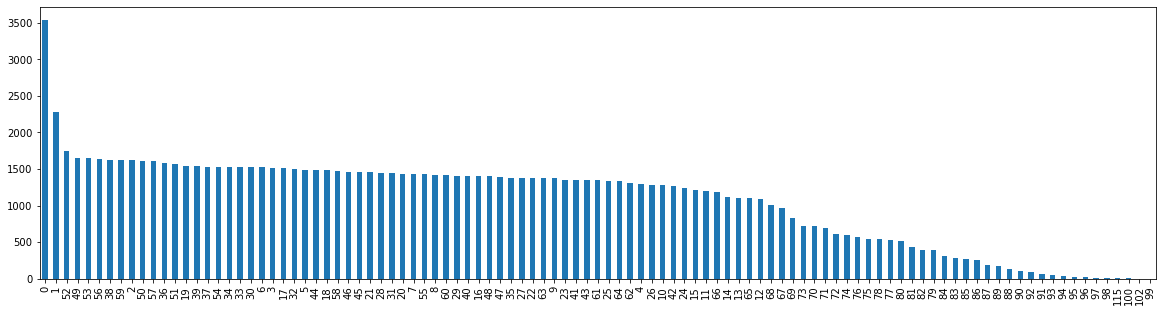

In [19]:
# Age distributions bar plot
df.age.value_counts().plot(kind="bar",figsize=(20,5));

We can see that the ages bar plot are not arranged so we would use `seaborn countplot` to arrange it and get the number of appointments by age

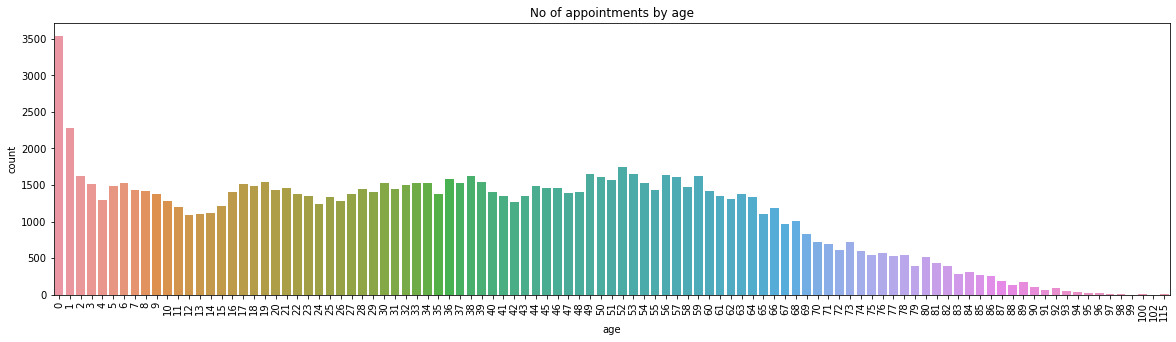

In [20]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.age)
ax.set_title("No of appointments by age")
plt.show()

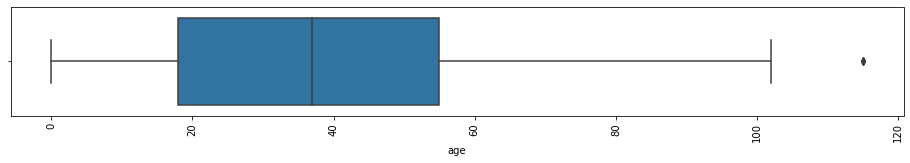

In [21]:
# A boxplot showing age values distribution
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
_ = sns.boxplot(x=df.age)

__NEIGHBOURHOOD__

In [22]:
# taken a closer look at neigbourhood
df['neighbourhood'].describe()

count             110526
unique                81
top       JARDIM CAMBURI
freq                7717
Name: neighbourhood, dtype: object

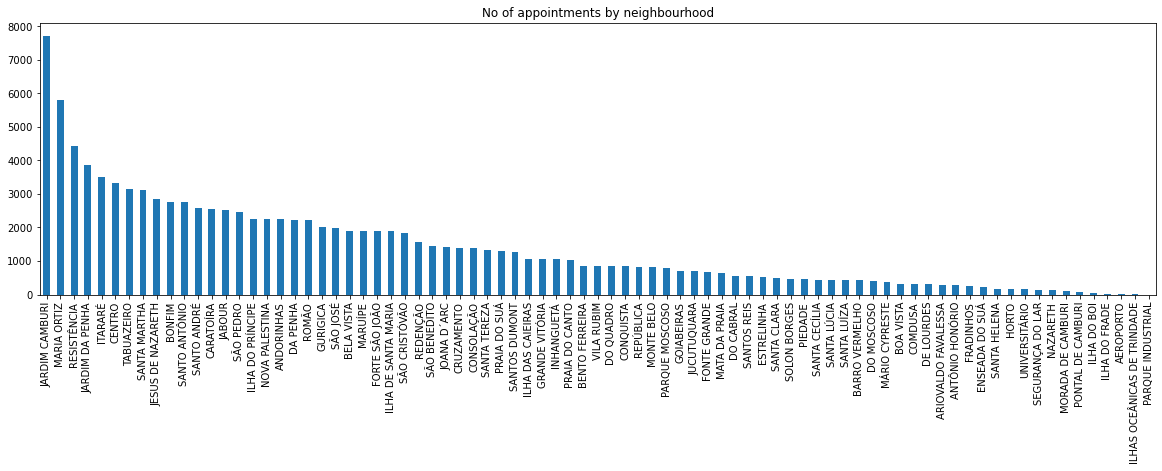

In [23]:
# Neigbourhood distributions bar plot
df.neighbourhood.value_counts().plot(kind="bar",figsize=(20,5));
plt.title("No of appointments by neighbourhood");

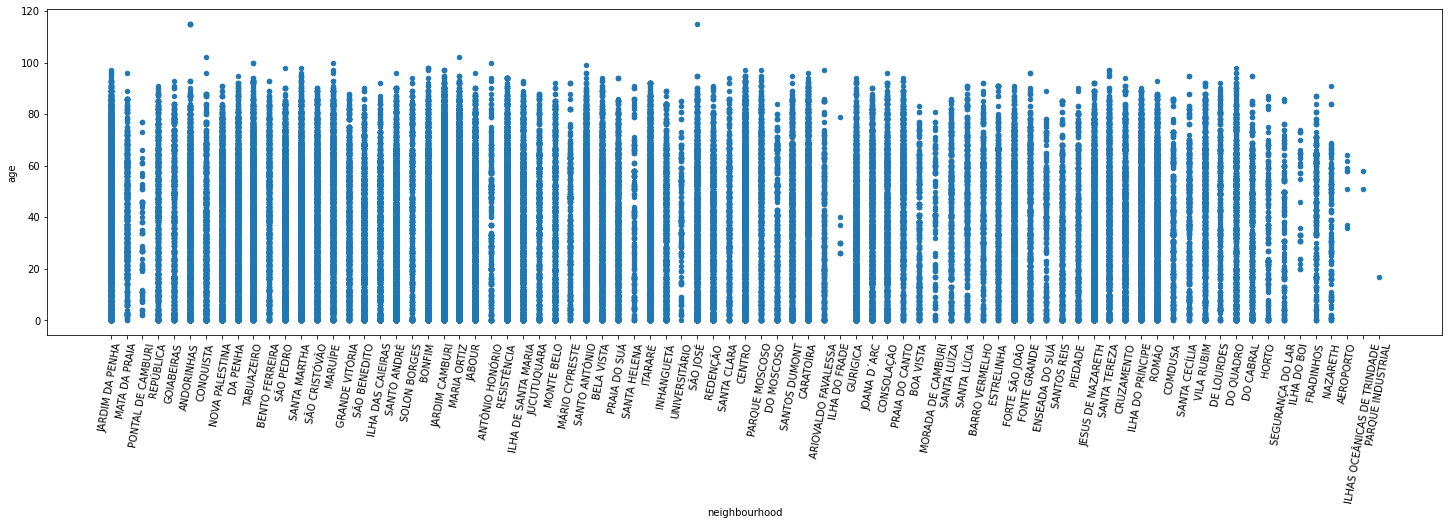

In [24]:
df.plot(x='neighbourhood', y='age', kind='scatter', figsize=(25,6));
plt.xticks(rotation=80);

Lastly we would do a groupby just to have a better insights to showing up for appointments.

In [25]:
df_grp = df.groupby(['no_show', 'gender'])[['age', 'scholarship', 'hipertension', 'sms_received']].describe();
df_grp.T

no_show                       No                         Yes             
gender                         F             M             F            M
age          count  57245.000000  30962.000000  14594.000000  7725.000000
             mean      39.591126     34.461372     36.162190    30.833010
             std       22.342413     24.734056     21.184209    22.972200
             min        0.000000      0.000000      0.000000     0.000000
             25%       22.000000     10.000000     20.000000    10.000000
             50%       40.000000     34.000000     34.000000    28.000000
             75%       57.000000     55.000000     52.000000    49.000000
             max      115.000000    100.000000    115.000000    97.000000
scholarship  count  57245.000000  30962.000000  14594.000000  7725.000000
             mean       0.117862      0.049609      0.144306     0.061100
             std        0.322447      0.217140      0.351412     0.239530
             min        0.000000      0.000000      0.000000     0.000000
             25%        0.000000      0.000000      0.000000     0.000000
             50%        0.000000      0.000000      0.000000     0.000000
             75%        0.000000      0.000000      0.000000     0.000000
             max        1.000000      1.000000      1.000000     1.000000
hipertension count  57245.000000  30962.000000  14594.000000  7725.000000
             mean       0.221539      0.172696      0.182061     0.144337
             std        0.415286      0.377990      0.385908     0.351453
             min        0.000000      0.000000      0.000000     0.000000
             25%        0.000000      0.000000      0.000000     0.000000
             50%        0.000000      0.000000      0.000000     0.000000
             75%        0.000000      0.000000      0.000000     0.000000
             max        1.000000      1.000000      1.000000     1.000000
sms_received count  57245.000000  30962.000000  14594.000000  7725.000000
             mean       0.305389      0.265358      0.460463     0.396634
             std        0.460576      0.441531      0.498451     0.489231
             min        0.000000      0.000000      0.000000     0.000000
             25%        0.000000      0.000000      0.000000     0.000000
             50%        0.000000      0.000000      0.000000     0.000000
             75%        1.000000      1.000000      1.000000     1.000000
             max        1.000000      1.000000      1.000000     1.000000

<a id='q1'></a>
### __Q1_Is there a correlation between age affects showing up for appointments?__

To answer this questions we will plot a histogram of ages of patients that showed up and those that didn't

In [26]:
# Plot chart
def plot_stack(df_grp, title: str, kind: str = 'line', legend: list = ["Showed","Missed"], figsize: tuple = (20, 6)):
    """
    A function that plots a dataframe stack for easy comparism.
    Inputs:
    :param df_grp: A groupby dataframe.
    :param title: Specify your title.
    :param kind: Specify the kind of chart. default is line. This is a string datatype.
    :param legend: Specify the Legend list for each stack plot. The default is ["Showed","Missed"]
    :param figsize: Specify your figsize. A tuple of (Width, Height). Default is (20, 6)
    Outputs:
    A plot.
    """
    df_grp.unstack().plot(kind=kind, stacked=True, figsize=figsize);

    plt.legend(legend);
    plt.title(title);

In [27]:
# making masks to use later
miss = df["no_show"] == "Yes"
show = df["no_show"] == "No"

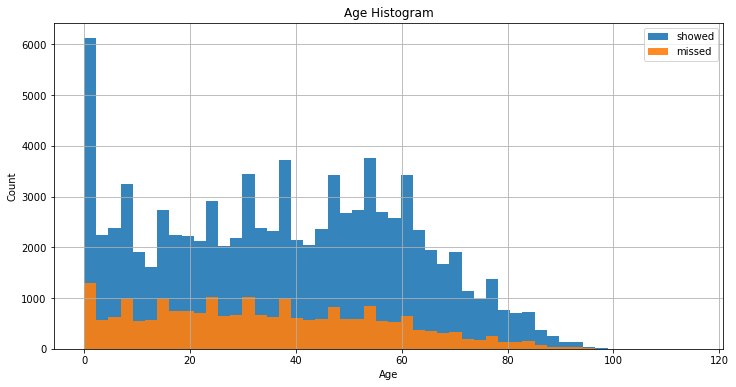

In [28]:
# histogram for ages of patients
df[show].age.hist(alpha=0.9, bins=50,label="showed", figsize=(12,6))
df[miss].age.hist(alpha=0.9, bins=50,label="missed", figsize=(12,6))
plt.legend();
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("Count");

We can also group ages by 10(s) to have a better view and then plot a bar graph of the percentage of patients that didn't show up/showed up across ages in ratio to total number of patients

In [29]:
age_grp = [x for x in range(0,130,10)]
df["age_grps"] = pd.cut(df.age, bins=age_grp)

age_counts = df.groupby("age_grps")["no_show"].value_counts()

In [30]:
# getting the mean across age distribution
(age_counts/age_counts.groupby(level=0).sum()*100)

age_grps    no_show
(0, 10]     No          79.296515
            Yes         20.703485
(10, 20]    No          74.746164
            Yes         25.253836
(20, 30]    No          75.375463
            Yes         24.624537
(30, 40]    No          78.527770
            Yes         21.472230
(40, 50]    No          80.097087
            Yes         19.902913
(50, 60]    No          82.625631
            Yes         17.374369
(60, 70]    No          85.271249
            Yes         14.728751
(70, 80]    No          84.460759
            Yes         15.539241
(80, 90]    No          84.001572
            Yes         15.998428
(90, 100]   No          80.398671
            Yes         19.601329
(100, 110]  No         100.000000
(110, 120]  Yes         60.000000
            No          40.000000
Name: no_show, dtype: float64

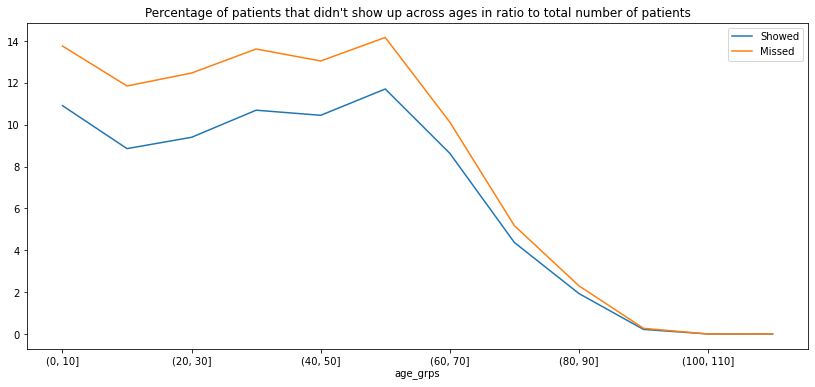

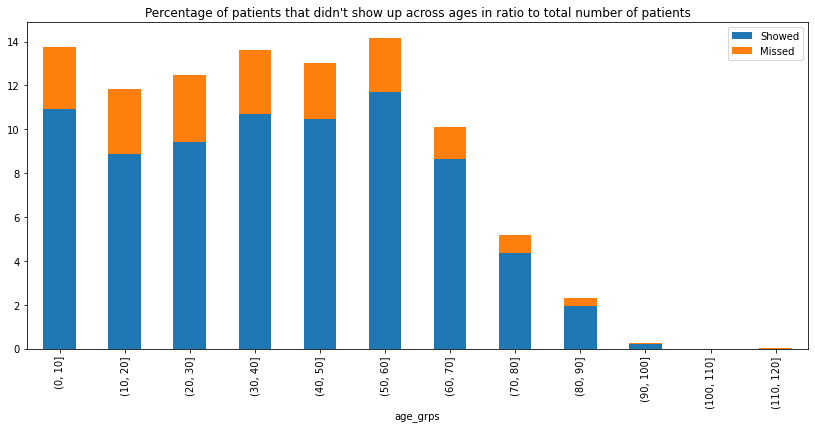

In [31]:
# Plotting a line and bar graph to see if there is any notable difference
normalized_age_counts = age_counts/len(df)*100
age_title = "Percentage of patients that didn't show up across ages in ratio to total number of patients"
plot_stack(normalized_age_counts, age_title, figsize=(14,6))
plot_stack(normalized_age_counts, age_title, kind='bar', figsize=(14,6))

### Obervation:

+ The mean of patients that did not show up across all ages is between 19% and 20%. Therefore there is no strong correlation between patient's age and not showing up for medical appointments.
+ Since the exploration (BoxPlot) of ages shows that most patients are between 15 and 0's, it therefore means that most patients that didn't show up are also between this age range.

<a id='q2'></a>
### __Q2_Is there a correlation between neighbourhood and showing up for appointments?__

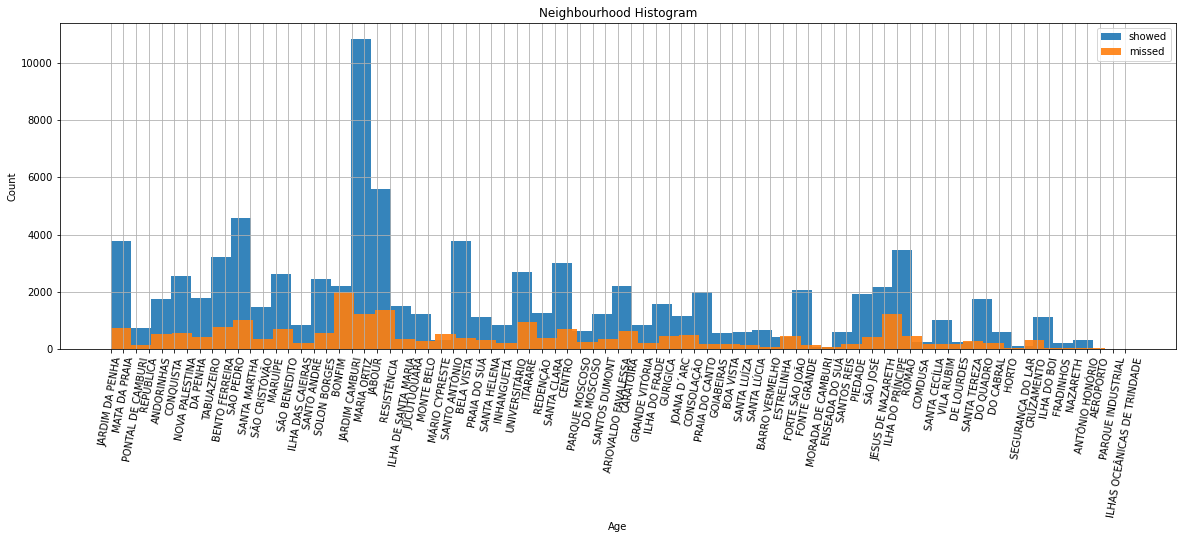

In [32]:
# histogram for neigbourhood of patients
df[show].neighbourhood.hist(alpha=0.9, bins=50,label="showed", figsize=(20,6))
df[miss].neighbourhood.hist(alpha=0.9, bins=50,label="missed", figsize=(20,6))
plt.xticks(rotation=80);
plt.legend();
plt.title("Neighbourhood Histogram")
plt.xlabel("Age")
plt.ylabel("Count");

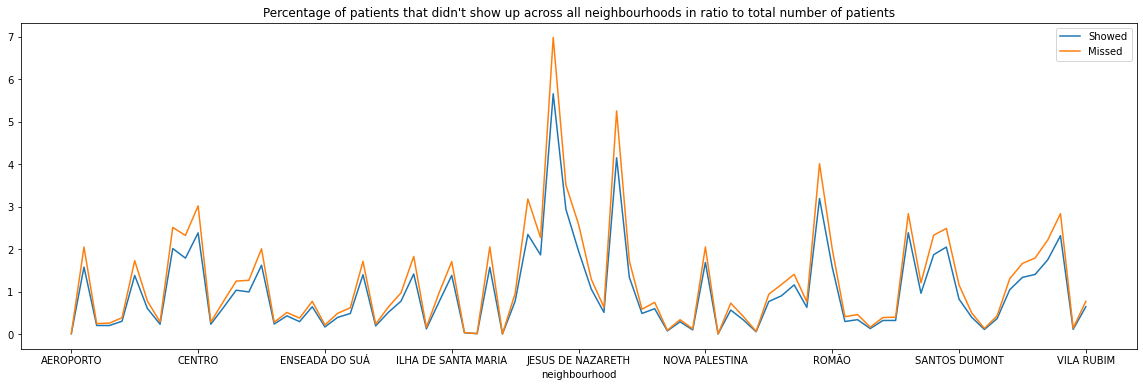

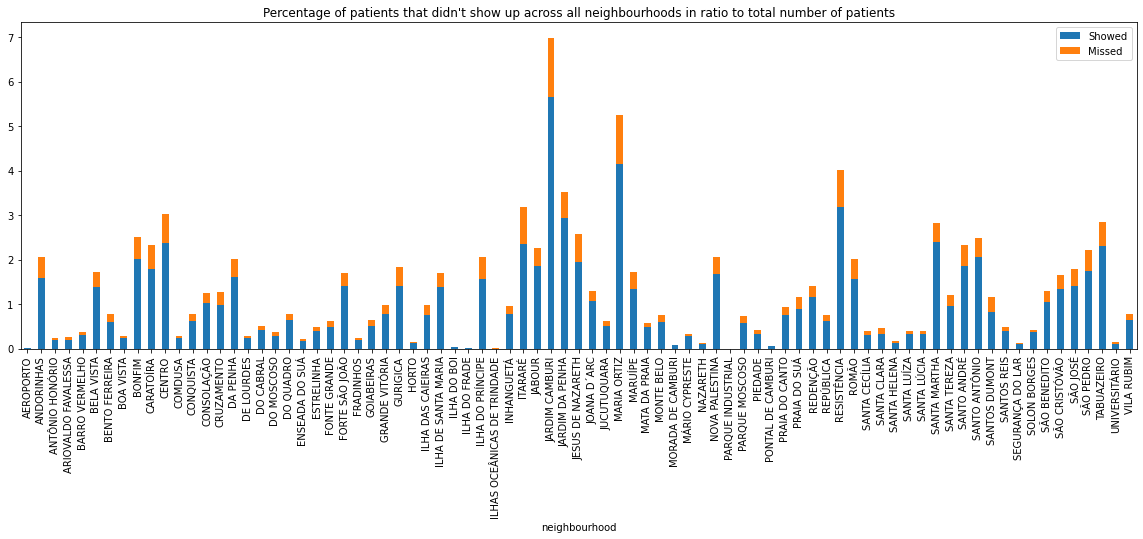

In [33]:
# Define groupby df
n_counts = df.groupby("neighbourhood")["no_show"].value_counts()

# Plotting a line and bar graph to see if there is any notable difference
normalized_n_counts = n_counts/len(df)*100
age_title = "Percentage of patients that didn't show up across all neighbourhoods in ratio to total number of patients"

plot_stack(normalized_n_counts, age_title)
plot_stack(normalized_n_counts, age_title, kind='bar')

In [34]:
# getting the mean across neighbourhood distribution
n_counts_mean = (n_counts/n_counts.groupby(level=0).sum()*100)
n_counts_mean.head(10)

neighbourhood        no_show
AEROPORTO            No         87.500000
                     Yes        12.500000
ANDORINHAS           No         76.967286
                     Yes        23.032714
ANTÔNIO HONÓRIO      No         81.549815
                     Yes        18.450185
ARIOVALDO FAVALESSA  No         78.014184
                     Yes        21.985816
BARRO VERMELHO       No         78.486998
                     Yes        21.513002
Name: no_show, dtype: float64

Notice that we have an outlier of 100. We will now remove this outlier and plot a histogram distribution of the mean across neighbourhood

In [35]:
print(f'mean: {n_counts_mean.unstack().Yes.mean()}, Standard deviation: {n_counts_mean.unstack().Yes.std()}')

mean: 20.79957228842361, Standard deviation: 9.503903388189572


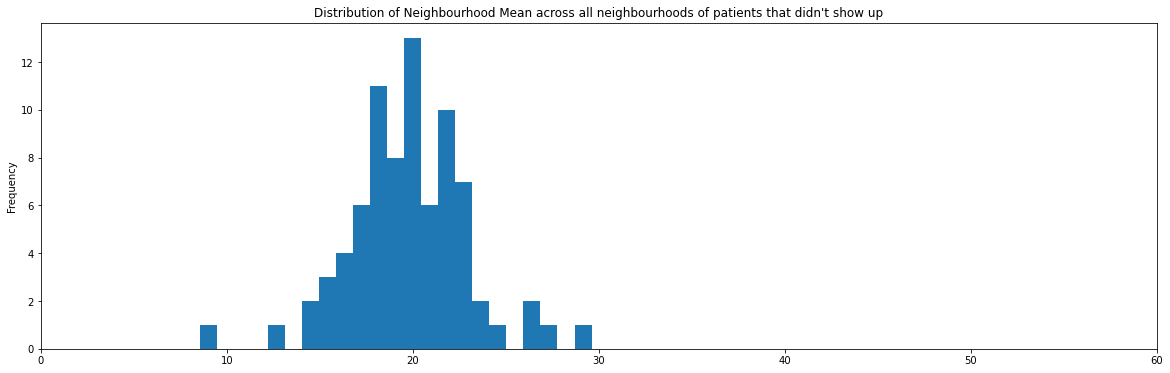

In [36]:
# Plotting a bar chart of mean of no show per neighbourhood
n_counts_mean.unstack().Yes.plot(kind="hist", bins=100, xlim=(0,60),figsize=(20,6));

plt.title("Distribution of Neighbourhood Mean across all neighbourhoods of patients that didn't show up");

### Obervation:

+ The normal distribution shows that The neighbourhood mean are also fairly evenly distributed across neighbourhood with a mean of about 20.
+ This means that the more patients in a neighbourhood the more likely the number of no show for an appointment.
+ Because the number of patients across neighborhood is not evenly distributed,  we can't conclude on its correlation.

<a id='q3'></a>
### __Q3_ Is there a correlation sms reminder affects showing up for appointments?__

In [37]:
sms_count = df.groupby("sms_received")["no_show"].value_counts()
sms_count

sms_received  no_show
0             No         62509
              Yes        12535
1             No         25698
              Yes         9784
Name: no_show, dtype: int64

In [38]:
sent_per = sms_count[1][1]/(sms_count[1][0]+sms_count[1][1])*100
not_sent = sms_count[0][1]/(sms_count[0][0]+sms_count[0][1])*100
print(f'Mean of sms received to total number of patient that missed their appointments:\n\
SMS Sent: {sent_per},\nSMS not Sent: {not_sent}')

Mean of sms received to total number of patient that missed their appointments:
SMS Sent: 27.574544839637,
SMS not Sent: 16.703533926762965


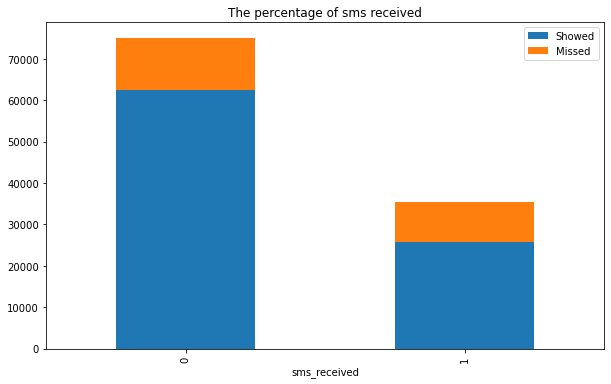

In [39]:
plot_stack(sms_count, title="The percentage of sms received", kind='bar', figsize=(10,6))

### Obervation:

+ Most patients did not receive an sms.
+ Although the sampling is not equal, the data shows that the likelihood of missing appointments after a patient recieves an sms reminder is higher. (27% to 16%).

<a id='q4'></a>
### __Q4_Is there a correlation hipertension affects showing up for appointments?__

In [40]:
h_count = df.groupby("hipertension")["no_show"].value_counts()
h_count

hipertension  no_show
0             No         70178
              Yes        18547
1             No         18029
              Yes         3772
Name: no_show, dtype: int64

In [41]:
hip_present = h_count[1][1]/(h_count[1][0]+h_count[1][1])*100
no_hip = h_count[0][1]/(h_count[0][0]+h_count[0][1])*100
print(f'Mean of hipertension to total number of patient that missed their appointments:\n\
Hipertension present: {hip_present},\nNo hipertension: {no_hip}')

Mean of hipertension to total number of patient that missed their appointments:
Hipertension present: 17.301958625751112,
No hipertension: 20.90391659622429


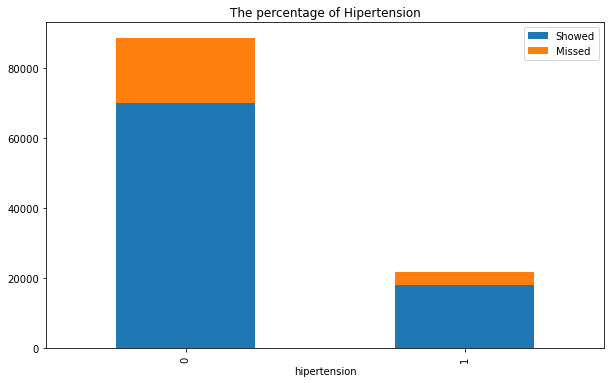

In [42]:
plot_stack(h_count, title="The percentage of Hipertension", kind='bar', figsize=(10,6))

### Obervation:

+ Most patients did are not hypertensive (80.3% to 19.7%).
+ Although the sampling is not equal, the data shows that the likelihood of hipertensive patients missing their appointments is lower. (17% to 20%).

<a id='q5'></a>
### __Q5_Is there a correlation gender affects showing up for appointments?__

In [43]:
gender_count = df.groupby("gender")["no_show"].value_counts()
gender_count

gender  no_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: no_show, dtype: int64

In [44]:
male = gender_count[3]/(gender_count[3]+gender_count[2])*100
female = gender_count[1]/(gender_count[0]+gender_count[1])*100
print(f'Mean of hipertension to total number of patient that missed their appointments:\n\
Male: {male},\nFemale: {female}')

Mean of hipertension to total number of patient that missed their appointments:
Male: 19.967947889471915,
Female: 20.314870752655242


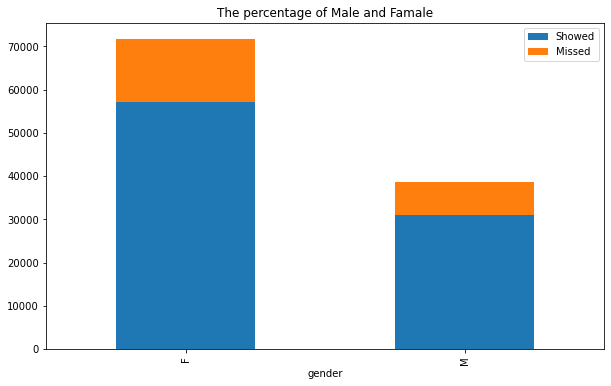

In [45]:
plot_stack(gender_count, title="The percentage of Male and Famale", kind='bar', figsize=(10,6))

### Obervation:

+ Most patients did are female (65% to 35%).
+ Although the sampling is not equal, the data shows that the likelihood of female/male patients missing their appointments is fairly the same. (19% to 20%).

<a id='conclusions'></a>
## Conclusions:


Using the No sho for medical appointment daaset, we investigated the correlation between the neighbourhood, age, sms reminder, gender, and hipertension, to determine whether a patient will show up or not to their appointment.

Below are a summary of the results of these analyses:

+ Patients between 12 to mid-40s are more likely to miss their appointments
+ kids and patients in their 60s, 70s, and 80s are more likely to show to their appointments
+ There is no correlation between gender alone and missing the appointment.
+ The neighborhoods with most patients showing to their appointments have low patients numbers. So, we couldn't conclude that these neighborhoods have a higher chance that patients won't miss their appointments.
+ Receiving an SMS did not increase the chance that the patient would show to their appointment.

### Limitations:

+ Dataset was collected in a limited duration (about 3 months) and the data was not really sufficient for an extensive analyses.
+ There was no documentation of how data was collected.
+ The SMS_received columns was not properly explained.
+ The dataset doesn't explain the purpose of the appointments.